# What are Tensors?

## Tensors

- GPU accelerators를 사용할 수 있는 점을 제외하고 numpy의 ndarrays와 유사함
- 사실, tensors와 Numpy arrays는 종종 같은 메모리를 공유하기도 함
- 자동 미분을 최적화하는 기능이 있음

In [1]:
import torch
import numpy as np

## Initializing a Tensor

### Directly from data
- 데이터 형은 자동으로 추론됨

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

### NumPy array

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

### From another tensor
- 기존 tensor의 properties(shape, data type) 정보를 활용할 수 있음

In [4]:
x_ones = torch.ones_like(x_data)
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.3524, 0.7619],
        [0.5994, 0.9592]])


### with random or constant values

In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.7674, 0.0508, 0.2153],
        [0.4521, 0.8009, 0.5083]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor
- Tensor의 attribute은 shape, data type, and 저장된 장치를 표현함

In [6]:
tensor = torch.rand(3, 4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


## Operations on Tensors
- 100개 이상의 Tensor operation은 https://pytorch.org/docs/stable/torch.html 에서 확인 가능
- 각 operation은 GPU를 활용할 수 있으며 일반적으로 GPU의 연산이 더욱 빠름
- Tensor는 기본적으로 CPU을 사용하도록 생성되므로 `.to` 함수를 사용하여 명시적으로 GPU로 옮겨야 함

In [7]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

### Standard numpy-like indexing and slicing

In [8]:
tensor = torch.rand(4, 4)
print("First row: ", tensor[:, 0])
print("First column: ", tensor[0, :])
print("Last column: ", tensor[-1, :])

tensor[:, 1] = 0
print(tensor)

First row:  tensor([0.5050, 0.8888, 0.3814, 0.5825])
First column:  tensor([0.5050, 0.6953, 0.0347, 0.3831])
Last column:  tensor([0.5825, 0.4344, 0.4942, 0.3436])
tensor([[0.5050, 0.0000, 0.0347, 0.3831],
        [0.8888, 0.0000, 0.9039, 0.1892],
        [0.3814, 0.0000, 0.5761, 0.0228],
        [0.5825, 0.0000, 0.4942, 0.3436]])


### Joining tensors
- torch.cat: 차원이 증가하지 않음
- torch.stack: 차원이 증가하면서 결합됨. `unsqueeze(0)` + `cat` 효과

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=0) # row-wide
print(t1)

tensor([[0.5050, 0.0000, 0.0347, 0.3831],
        [0.8888, 0.0000, 0.9039, 0.1892],
        [0.3814, 0.0000, 0.5761, 0.0228],
        [0.5825, 0.0000, 0.4942, 0.3436],
        [0.5050, 0.0000, 0.0347, 0.3831],
        [0.8888, 0.0000, 0.9039, 0.1892],
        [0.3814, 0.0000, 0.5761, 0.0228],
        [0.5825, 0.0000, 0.4942, 0.3436],
        [0.5050, 0.0000, 0.0347, 0.3831],
        [0.8888, 0.0000, 0.9039, 0.1892],
        [0.3814, 0.0000, 0.5761, 0.0228],
        [0.5825, 0.0000, 0.4942, 0.3436]])


In [10]:
t2 = torch.cat([tensor, tensor, tensor], dim=1) # column-wide
print(t2)

tensor([[0.5050, 0.0000, 0.0347, 0.3831, 0.5050, 0.0000, 0.0347, 0.3831, 0.5050,
         0.0000, 0.0347, 0.3831],
        [0.8888, 0.0000, 0.9039, 0.1892, 0.8888, 0.0000, 0.9039, 0.1892, 0.8888,
         0.0000, 0.9039, 0.1892],
        [0.3814, 0.0000, 0.5761, 0.0228, 0.3814, 0.0000, 0.5761, 0.0228, 0.3814,
         0.0000, 0.5761, 0.0228],
        [0.5825, 0.0000, 0.4942, 0.3436, 0.5825, 0.0000, 0.4942, 0.3436, 0.5825,
         0.0000, 0.4942, 0.3436]])


In [11]:
t3 = torch.stack([tensor, tensor, tensor], dim=0) # dim=0
print(t3)

tensor([[[0.5050, 0.0000, 0.0347, 0.3831],
         [0.8888, 0.0000, 0.9039, 0.1892],
         [0.3814, 0.0000, 0.5761, 0.0228],
         [0.5825, 0.0000, 0.4942, 0.3436]],

        [[0.5050, 0.0000, 0.0347, 0.3831],
         [0.8888, 0.0000, 0.9039, 0.1892],
         [0.3814, 0.0000, 0.5761, 0.0228],
         [0.5825, 0.0000, 0.4942, 0.3436]],

        [[0.5050, 0.0000, 0.0347, 0.3831],
         [0.8888, 0.0000, 0.9039, 0.1892],
         [0.3814, 0.0000, 0.5761, 0.0228],
         [0.5825, 0.0000, 0.4942, 0.3436]]])


In [12]:
t4 = torch.cat([tensor.unsqueeze(0), tensor.unsqueeze(0), tensor.unsqueeze(0)], dim=0)
print(t3 == t4)

tensor([[[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]],

        [[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]],

        [[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]])


In [13]:
t5 = torch.stack([tensor, tensor, tensor], dim=1) # dim=1
print(t5)

tensor([[[0.5050, 0.0000, 0.0347, 0.3831],
         [0.5050, 0.0000, 0.0347, 0.3831],
         [0.5050, 0.0000, 0.0347, 0.3831]],

        [[0.8888, 0.0000, 0.9039, 0.1892],
         [0.8888, 0.0000, 0.9039, 0.1892],
         [0.8888, 0.0000, 0.9039, 0.1892]],

        [[0.3814, 0.0000, 0.5761, 0.0228],
         [0.3814, 0.0000, 0.5761, 0.0228],
         [0.3814, 0.0000, 0.5761, 0.0228]],

        [[0.5825, 0.0000, 0.4942, 0.3436],
         [0.5825, 0.0000, 0.4942, 0.3436],
         [0.5825, 0.0000, 0.4942, 0.3436]]])


## Arithmetic operations

In [14]:
# 행렬 곱
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[0.4030, 0.5527, 0.2213, 0.4430],
        [0.5527, 1.6429, 0.8640, 1.0295],
        [0.2213, 0.8640, 0.4778, 0.5147],
        [0.4430, 1.0295, 0.5147, 0.7016]])

In [15]:
(y1 == y2) & (y1 == y3)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [16]:
# element-wise product
z1 = tensor * tensor.T
z2 = tensor.mul(tensor.T)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor.T, out=z3)

tensor([[0.2551, 0.0000, 0.0132, 0.2231],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0132, 0.0000, 0.3319, 0.0113],
        [0.2231, 0.0000, 0.0113, 0.1180]])

In [17]:
(z1 == z2) & (z1 == z3)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Single-element tensors
아래 예제와 같이 모든 Tensor의 값이 하나로 합쳐지는 경우, `item()` 함수를 사용하여 Python 숫자형 값으로 젼환 가능

In [18]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.305268287658691 <class 'float'>


### In-plale operations
- 피연산자에 결과를 저장하는 함수를 의미하며, `_` suffix로 표현됨
- 예를 들어 `x.copy_()`, `x.t_()`는 x를 변경함

> **Note:** 메모리를 절약할 수는 있지만 즉시 연산 히스토리가 사라지기 때문에 주의해서 사용 필요

## Bridge with NumPy
CPU Tensor와 NumPy array는 메모리를 공유할 수 있음
 
### Tensor to NumPy array

In [19]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [20]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor

In [21]:
n = np.ones(5)
t = torch.from_numpy(n)

In [22]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Load data with PyTorch Datasets and DataLoaders

In [23]:
%matplotlib inline

## Datasets and Dataloaders
- 좀 더 읽기 쉽고 모듈화하기 위해 모델 학습코드와 데이터셋 코드가 결합지 않기를 원했음
- Pytorch는 두 가지 데이터 기본 기능을 제공
    - `torch.utils.data.DataLoader`
    - `torch.utils.data.Dataset`
- `Dataset`은 데이터와 레이블을 저장하고 `DataLoader`는 iterable 객체처럼 쉽게 읽을 수 있도록`Dataset`을 감싸는 형태

### Loading a dataset
- TorchVision을 활용하여 [Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) 을 읽는 예제
    - 60,000개의 학습 데이터와 10,000개의 테스트 데이터로 구성됨
    - 28*28 grayscale image, 10 classes

In [24]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", # data path
    train=True,
    download=True, # root에 데이터가 없는 경우 다운받음
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset

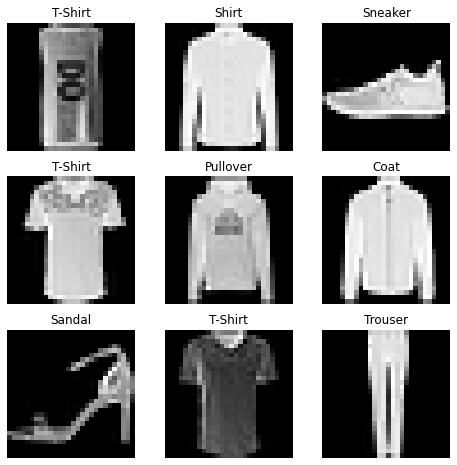

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files
- `__init__`, `__len__`, and `__getitem__` 3가지 함수를 꼭 구현해 함
    - `__init__`: images directory, annotation file, transforms 초기화
    - `__dataset__`: sample 수를 반환
    - `__getitem__`: `idx`에 해당하는 이미지와 레이블을 읽어서 반환
- FashionMNIST dataset를 직접 호출하는 예제

In [26]:
import os 
import pandas as pd 
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.transform
        sample = {"image":image, "label":label}
        return sample    

## Preparing your data for training with DataLoaders

- `Dataset`은 한 번에 하나의 샘플을 반환함
- 모델을 학습하는 동안 minibatch"를 사용함 (모델의 과적합을 방지하기 위해 매 epoch바다 데이터의 순서를 변경함)
- Python의 multiprocessing을 사용하면 속도를 개선할 수 있음
- DataLoader는 손쉬운 API를 통해 이러한 복합성을 추상화한 iterable임

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


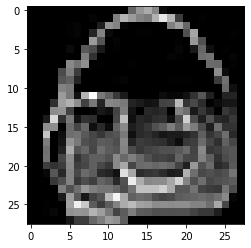

Label: Bag


In [28]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

# Transform the data
- 기계학습 알고리즘이 원하는 최종 처리된 형태의 데이터를 항상 얻을 수는 없기 때문에 학습에 알맞은 형태로 변환하는 경우가 많음
- 모든 TrochVision dataset은 두 가지 Parameter(`transform`, `target_transform`)의 설정을 통해 [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)에서 제공하는 변환 함수를 사용할 수 있음 
- FashonMNIST의 경우 PIL Image format으로 저장되어 있어 feature는 정규화된 tensor로, 레이블은 one-hot  encoded tensor의 변환이 필요함
- 이를 위해 `ToTnesor`, `Lambda`를 사용할 예정임

In [29]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### ToTensor()
[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)는 PIL image, Numpy ndarray를 `FloatTensor` 로 변환하며 [0., 1.] 구간의 값으로 스케일을 변경함
### Lambda transforms
사용자 정의 합수 적용 시에 사용하여 위의 예시에서는 정수값을 one-hot vector로 변환하는 사용자 합수를 대입하였음

# Building the model layers
## Build a neural network
- [torch.nn](https://pytorch.org/docs/stable/nn.html) 네임스페이스는 사용자 고유의 신경망을 구성할 수 있는 모든 블럭을 제공함
- 신경망은 다른 모듈(층)으로 구성된 그 자체이며, 중쳡된 구조는 복잡한 신경망을 쉽게 관리하고 생성할 수 있도록 함

In [30]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get a hardware device for training
GPU를 활용한 하드웨어 가속이 가능한지 확인하고 불가능하다면 CPU로 진행

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Define the class

- `nn.module`을 사용해서 신경망을 정의하고 `__init__`에서 layer들을 초기화
- 모든 `nn.module` subclass 구현은 `forward` 함수 안에서 입력 데이터에 동작

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

`NeuralNetwork` 인스턴스를 만들고 장치와 구조를 출력함

In [33]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


- 모델을 사용하기 위해, 입력 데이터를 통과시켜야 하며, 모델의 `forward` 함수을 실행하면 됨
- 모델에 전달하만 백그라운드 연산에 의해 `forward` 함수가 실행되며, 직접 호출해서는 안됨
- 모델의 호출은 각 범주의 예측값을 담은 10 차원 tensor를 반환함. 이를 nn.Softmax에 통화시기면 예측의 확률밀도를 얻을 수 있음

In [34]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)

"""
tensor([[0.0983, 0.1032, 0.1035, 0.0983, 0.0983, 0.0983, 0.0983, 0.1008, 0.1027,
         0.0983]], device='cuda:0', grad_fn=<SoftmaxBackward>)
"""

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


### Model layers

FashionMNIST model의 네트워크를 나누어서 살펴보고, 이미지 3개(28*28)가 포함된 미니배치를 네트워크에 통과시켜서 변화를 확인할 예정

In [35]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)는 2D 28×28 이미지를 연속된 784픽셀 이미지로 전환(미니배치 차원(at dim=0)은 유지됨)

In [36]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear
[linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)는 저장된 가중치와 편향을 사용하여 입력 데이터를 선형 변환함

In [37]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU
비선형 활성 함수는 모델의 입력과 출력 사이의 복잡한 연결(비선형성)을 생성함. 이 모델에서는 [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)을 사용하였으나 다른 비성형 활성 함수를 사용할 수도 있음

In [38]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1978, -0.2201,  0.4359,  0.5191, -0.3190, -0.2370, -0.4388,  0.6063,
         -0.0011,  0.0814,  0.2411, -0.0049, -0.6174,  0.1177,  0.1826,  0.0585,
         -0.1842, -0.2568,  0.0955,  0.1145],
        [-0.0263, -0.0821,  0.1672,  0.5268, -0.1781,  0.1370, -0.5412,  0.3732,
          0.3383,  0.1208,  0.5933, -0.2121, -0.6746,  0.0547,  0.1921, -0.2851,
         -0.2815, -0.2852,  0.0291, -0.1473],
        [-0.0492, -0.5013,  0.2482,  0.2134, -0.0733, -0.3063, -0.3339,  0.7264,
          0.1527,  0.2288, -0.0534, -0.1699, -0.8194,  0.0957,  0.2727, -0.4103,
         -0.3895, -0.3721, -0.1096,  0.1564]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.1978, 0.0000, 0.4359, 0.5191, 0.0000, 0.0000, 0.0000, 0.6063, 0.0000,
         0.0814, 0.2411, 0.0000, 0.0000, 0.1177, 0.1826, 0.0585, 0.0000, 0.0000,
         0.0955, 0.1145],
        [0.0000, 0.0000, 0.1672, 0.5268, 0.0000, 0.1370, 0.0000, 0.3732, 0.3383,
         0.1208, 0.5933, 0.0000, 0.0000, 0.0547, 0.192

#### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)은 모듈 들의 순서를 정의하고, 데이터는 정의한 순서대로 모든 모듈을 통과함. 

In [39]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image - torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#### nn.Softmax
신경망의 마지막 층에서는 범위가 [-infty, infty] 인 `logits`을 반환하므로 [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)을 사용하여 [0, 1] 사이의 값 즉, 각 범주의 예측 확률변수로 나타낼 수 있음. `dim` parameter는 해당 축의 합이 1인 차원을 가리킴.

In [40]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

신경망의 많은 layer는 파라미터로 나타낼 수 있으며, 파라미터 학습 중 최적화됨. `nn.Module` 를 상속하면 자동으로 모델 내 파라미터들이 추적되며, 모든 파라미터는 모델의 `parameters()` 혹은 `named_parameters()` 함수로 접근할 수 있음

In [41]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : Parameter containing:
tensor([[-0.0086,  0.0239, -0.0357,  ...,  0.0343,  0.0206, -0.0123],
        [ 0.0189, -0.0171,  0.0202,  ...,  0.0341,  0.0136,  0.0257],
        [-0.0102, -0.0332,  0.0130,  ...,  0.0234, -0.0336, -0.0092],
        ...,
        [-0.0231, -0.0305,  0.0154,  ..., -0.0051,  0.0187, -0.0177],
        [ 0.0202, -0.0222, -0.0080,  ...,  0.0005, -0.0284, -0.0005],
        [ 0.0066, -0.0343,  0.0037,  ...,  0.0334, -0.0224, -0.0167]],
       device='cuda:0', requires_grad=True) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values

# Automatic differentialtion
## Automatic differentiation with torch.autograd
- 신경망을 학습할 때 **back propagation** 을 주로 사용하며, 손실함수의 **gradient**에 따라 모델의 weigth가 조절됨
- Pytorch에는 `torch.autograd` 라는 내장 미분계산 엔진이 있어 gradient 자동 계산을 지원함
- 입력 백터 `x`, 파라미터 `w`, `b` 그리고 어떤 손실함수로 구성된 단일층 신경망을 고려했을 때, 아래와 같이 Pytorch로 정의할 수 있음

In [42]:
import torch

x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensors, Functions and Computational graph
- 위 코드는 아래의 **computational graph**를 정의함
![Diagram showing a computational graph with two parameters 'w' and 'b' to compute the gradients of loss.](images/computational-graph.png)
- `w`, `b`는 최적화가 필요한 파라미터이므로 손실함수의 gradients의 자동 계산을 위해 `requires_grad` 를 true로 설정하였음
> Tensor를 생성할 때 requires_grad를 설정하거나 만든 뒤에는 x.requires_grad_(True)로 설정 가능함
- computational graph 생성을 위해 실행한 함수는 사실 `Funtion` class의 object임
- 이 object는 forword 방향의 연산과, 미분하는 동안의 backward propagarion의 계산을 어떻게 해야하는지 알고 있으며, Tensor의 `grad_fn` property에 저장하고 있음

In [43]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f5660416f90>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f563cb31310>


미분 계산을 위해 `loss.backward()`을 호출 후 `w.grad`, `b.grad`를 호출하여 값 확인

In [44]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2564, 0.0207, 0.3236],
        [0.2564, 0.0207, 0.3236],
        [0.2564, 0.0207, 0.3236],
        [0.2564, 0.0207, 0.3236],
        [0.2564, 0.0207, 0.3236]])
tensor([0.2564, 0.0207, 0.3236])


> **Note** requires_grad 설정이 True인 leaf node에서만 grad를 사용할 수 있음. 또한 성능을 고려하여 주어진 그래프에서 gradient는 한번만 호출될 수 있음. 같은 그래프에서 반복적으로 호출하기 위해서는 `backward` 호출에 retain_graph=True로 설정해야 함

### Disabling gradient tarcking
모든 Tensor는 기본적으로 `requires_trad=True`로 설정되어 계산 이력이 추적되어, gradient 계산을 지원함. 그러나 학습된 모델에서 입력값을 추론하는 경우에는 단지 forward만 필요할 것임. 이러한 경우 `with torch.no_grad()` 블럭을 사용하여 기본 동작을 정지할 수 있음

In [45]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


`detach` 함수를 사용하여 같은 결과를 얻을 수 있음

In [46]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


gradient tracking을 정지하는 이유는 아래와 같음
- [fine tuning a pre-trained network](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) 에서 자주 사용하는 시나리오로써 신경망의 파라미터를 고정하기 위함
- 이미 학습이 끝난 모델을 사용하여 추론하는 경우 forward pass만 필요하므로 gradient 추적을 하지 않음으로써 성능 향상이 가능함

## More on Computational Graph

개념적으로 Autograd는 Function Object로 구성된 DAG 안에 있는 모든 연산자와 데이터를 유지함. DAG에서 leaf는 입력 Tensor를 root는 출력 Tensor이며, Leaf(input)에서 Root(output)까지 추적이 가능하므로, chain rule을 사용하여 자동으로 gradient를 계산할 수 있음.

Forward pass에서 autograd는 두 가지를 동시에 수행함
- 연산자를 실행하여 Tensor의 계산 결과를 제공함
- DAG에서 연산자의 gradient 기능을 유지

Backward pass에서 DAG root에서 `backward()`가 호출되었을 때 autograd는
- 각 `.grad_fn`에서 gradient를 계산
- Chain Rule를 사용하여 각 Tensor의 .grad 속성을 누적 계산하고, leaf tensor까지 모든 방향으로 전파함

### DAGs are dynamic in Pytorch
- 주목할 점은 그래프가 처음부터 다시 생성된다는 것
- `.backward()` 호출 후 autograd는 새 그래프를 생성하기 시작. 이것이 바로 모델에서 제어 흐름을 사용할 수 있도록 함. 필요한 경우 반복할 때 마다 모양, 크기 및 연산의 변경이 가능함

# Learn about the optimization loop
## Optimizing the model parameters
- 모델을 학습하는 것은 반복적인 프로세스이며 epoch로 불리우는 각 반복 단계에서 모델은 출력과 에러를 계산
- 이후에는 모듈에서의 파라미터와 관련된 에러의 미분값을 수집하고 경사하강법을 사용하여 파라미터를 최적화함
- 이 프로세스의 자세한 내용은 [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8)를 참고바람

### Prerequisite code
앞에서 소개된 코드로부터 **Dataset**, **DataLoaders**, **Build Model** 모듈이 필요

In [47]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()

## Setting hyperparameters
하이퍼파라미터는 모델 최적화 프로세스를 제어하는 조절 가능한 파라미터를 의미함. 하이퍼파라미터는 모델 학습과 수렴 속도에 영향을 줌([참고](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html))

모델 훈련을 위해 다음의 하이퍼파라미터를 정의
- **Number of Epochs** - 데이터 전체의 반복 횟수
- **Bactch Size** - 각 epoch에서 모델에 보여지는 데이터 샘플 수 
- **Learning Rate** - 각 batch와 epoch에서의 업데이트 크기로 작은 값는 학습 속도가 느려지지만, 큰 값은 학습 동안 예측할 수 없는 결과를 초래함

In [49]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Add an optimization loop

하이퍼파라미터를 설정한 다음으로 최적화 반복을 사용하여 모델 학습과 최적화할 수 있음. 최적화를 위한 각 반복을 **epoch**라 부름. 각 epoch는 두 부분으로 구성됨.
- The Train Loop - 데이터 전체를 학습하고 최적 파라미터로 수렴을 반복적으로 시도함
- The validation/Test Loop - 테스트 데이터 전반에서 모델 성능이 향상되었는지 확인을 반복함

### Add a loss function
손실함수는 목표값과 모델로 부터 얻은 값 사이의 차이를 측정하므로 학습하는 동안 최소화되길 원함. 손실을 계산하기 위해 주어진 데이터 샘플을 사용하여 예측한 값과 실제  값의 차이를 비교함

일반적인 손실 함수는 [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error, regression), [nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood, classification), [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) (combines `nn.LogSoftmax` and `nn.NLLLoss`.)

출력 logit을 `nn.CrossEntropyLoss`로 전달하면, logit을 정규화하고 및 예측 에러를 계산함

In [50]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimization pass
- 최적화는 각 학습 단계에서 모델 오차를 줄이기 위해 파라미터를 조절하는 단계
- 모든 최적화 로직은 `optimizer` object로 캡슐레이션 되어있음
- ADAM, RMSProp와 같은 다양한 최적화 알고리즘을 사용할 수 있음 ([different optimizers](https://pytorch.org/docs/stable/optim.html))
- 학습률를 전달하고 학습에 필요한 파라미터를 등록함으로써 optimizer를 초기화 할 수 있음

In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

반복 학습과정 내부에는 최적화가 3단계로 진행됨
- 모델 파라미터의 경사 초기화를 위해 `optimizer.zero_grad()` 호출함. 기본값에 의해 경사는 누적됨. 이중 계산을 막기 위해 각 반복에서 명시적으로 0을 초기화해야 함
- `loss.backwards()`을 사용하여 예측 오차를 역전파. Pytorch는 각 파라미터 손실의 경사를 저장함.
- `optimizer.step()` 호출하면 역전파 경로에서 수집된 경사로 인해 파라미터를 조절할 수 있음.


### Full implementation

In [52]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

`train_loop` 와 `test_loop`에 손실함수, 최적화 함수를 전달. 모델 성능향상을 위해 epoch 수를 높게 조절할 수 있음.

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300640  [    0/60000]
loss: 2.290309  [ 6400/60000]
loss: 2.286352  [12800/60000]
loss: 2.284961  [19200/60000]
loss: 2.274725  [25600/60000]
loss: 2.273580  [32000/60000]
loss: 2.268600  [38400/60000]
loss: 2.267196  [44800/60000]
loss: 2.237566  [51200/60000]
loss: 2.240211  [57600/60000]
Test Error: 
 Accuracy: 43.2%, Avg loss: 0.035035 

Epoch 2
-------------------------------
loss: 2.225451  [    0/60000]
loss: 2.211274  [ 6400/60000]
loss: 2.202846  [12800/60000]
loss: 2.202437  [19200/60000]
loss: 2.185632  [25600/60000]
loss: 2.186528  [32000/60000]
loss: 2.178825  [38400/60000]
loss: 2.179127  [44800/60000]
loss: 2.110761  [51200/60000]
loss: 2.115404  [57600/60000]
Test Error: 
 Accuracy: 43.8%, Avg loss: 0.033081 

Epoch 3
-------------------------------
loss: 2.113491  [    0/60000]
loss: 2.087825  [ 6400/60000]
loss: 2.064968  [12800/60000]
loss: 2.056619  [19200/60000]
loss: 2.046947  [25600/60000]
loss: 2.065896  [32000/600

# Save, Load and run model predictions 
모델 상태를 지속하기 위해 저장, 읽은 후 예측 모델을 동작하는 방법을 다룸

In [54]:
import torch
import torch.onnx as onnx
import torchvision.models as models 

## Saving and loading model weights
pytorch 모델은 학습한 파라미터를 `state_dict`이라고 하는 내부 dictionary에 보관함. `torch.save` 함수를 사용하여 이를 저장할 수 있음

In [55]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), "data/model_weights.pth")

모델의 가중치를 다시 읽기 위해, 구조가 같은 모델 인스턴스를 만들고 load_state_dict() method로 파라미터를 읽어서 적용할 수 있음.

In [56]:
model = models.vgg16()
model.load_state_dict(torch.load("data/model_weights.pth"))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

> **Note:** dropout이나 batch norm이 평가모드로 설정되도록 `model.eval()` 함수를 평가 전 호출했는지 확인해야 함. 호출하지 않았다면 일관적이지 않은 결과를 도출할 수 있음.

## Saving and loading models with shapes
모델의 가중치를 읽을 때에는 모델 클래스에 신경망의 구조가 정의되어 있으므로 모델 클래스의 인스턴스를 먼저 만드는 것이 필요함. 때문에 신경망의 파라미터와 더불어 신경망의 구조를 함께 저장하기 원한다면 `model.state_dict()` 대신 `model` 자체를 저장하거나 읽을 수 있음.

In [57]:
torch.save(model, 'data/vgg_model.pth')

In [58]:
model = torch.load('data/vgg_model.pth')

## Exporting the model to ONNX
- 다른 플랫폼, 다른 언어에서도 테스트가 가능하도록 기능 지원(ONNX runtime 필요)
- input_image는 맞은 자료형과 모양이라면 랜덤하게 결정되어도 무방함. sample data 개념.

[참고자료]
- [Pytorch를 모델을 ONNX으로 변환하고 ONNX 런타임에서 실행하기](https://tutorials.pytorch.kr/advanced/super_resolution_with_onnxruntime.html)
- [Pytorch를 ONNX에서 export 하기](https://yunmorning.tistory.com/17)
- https://netron.app/

In [59]:
input_image = torch.zeros((1,3,224,224))
onnx.export(model, input_image, 'data/model.onnx')